In [13]:
import os
import requests
import pandas as pd
import numpy as np
import quantstats as qs
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline
qs.extend_pandas()

In [14]:
load_dotenv()

True

In [15]:
# Define Alapca API keys, create tradeapi
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")


In [16]:
# Define the universal variables used throughout the notebook
start_date = pd.Timestamp('2018-07-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-06', tz='America/New_York').isoformat()

stock_names = ["Microsoft", "Sysco", "FedEx", "Rio Tinto", "Home Depot", "Starbucks", "Coca Cola"]
tickers = ["MSFT", "SYY", "FDX", "RIO", "HD", "SBUX", "KO"]
asset_weights = [0.2, 0.1, 0.15, 0.1, 0.2, 0.1, 0.15]
number_of_years = 5
investment_amount = 100000
SPY_weight = [1.0]


# Get prices for all stocks in the portfolio from the Alpca API
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe="1Day",
    start = start_date,
    end = end_date
).df

# Get prices for SPY from the Alpca API
df_SPY = alpaca.get_bars(
    "SPY",
    timeframe="1Day",
    start = start_date,
    end = end_date
).df


In [17]:
# Assign each stock's data to its own dataframe and remove unnecessary columns
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SYY = df_portfolio[df_portfolio['symbol']=='SYY'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
FDX = df_portfolio[df_portfolio['symbol']=='FDX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
RIO = df_portfolio[df_portfolio['symbol']=='RIO'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
HD = df_portfolio[df_portfolio['symbol']=='HD'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SBUX = df_portfolio[df_portfolio['symbol']=='SBUX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
KO = df_portfolio[df_portfolio['symbol']=='KO'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

# Combine all the stock dataframes into one, format date
stock_data_df = pd.concat([MSFT, SYY, FDX, RIO, HD, SBUX, KO], 
            axis=1, keys=["MSFT", "SYY", "FDX", "RIO", "HD", "SBUX", "KO"])
stock_data_df.index = stock_data_df.index.date

# Do the same as above but for the SPY data
SPY = df_SPY.drop(['trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

SPY_df = pd.concat([SPY], axis=1, keys=["SPY"])
SPY_df.index = SPY_df.index.date

#display(stock_data_df)
#display(SPY_df)

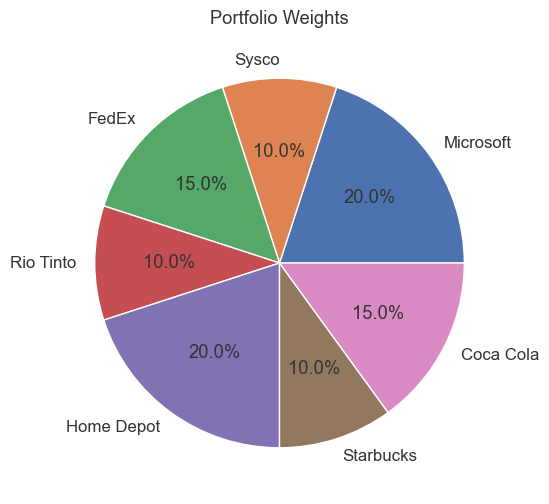

In [18]:
# Create a pie chart
plt.pie(asset_weights, labels=stock_names, autopct='%1.1f%%')

# Add a title
plt.title('Portfolio Weights')

# Display the chart
plt.show()


# HISTORIC DRAWDOWN ANALYSIS

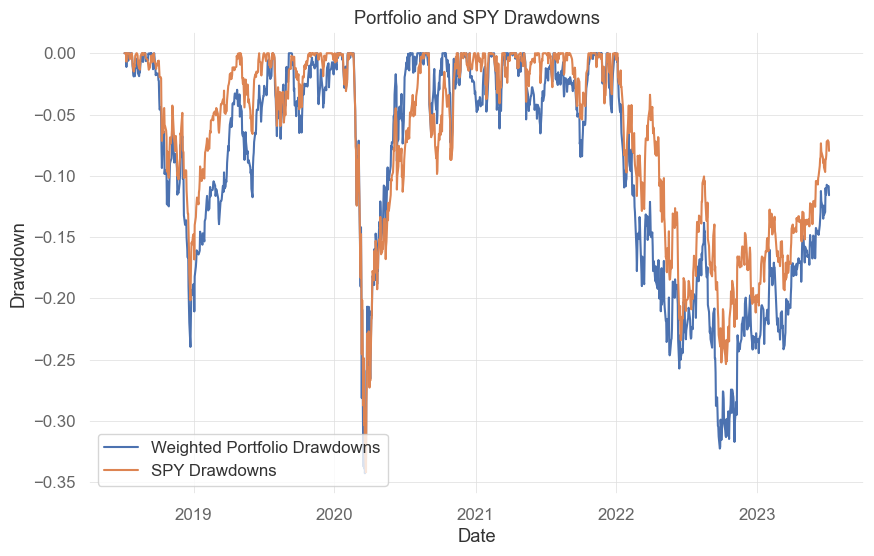

In [19]:
# Visualizing the drawdowns of your portfolio and the benchmark can help you understand the downside risk and recovery periods.
    

# Calculate portfolio value for stock_data_df
portfolio_value = stock_data_df * investment_amount

# Calculate portfolio value for SPY_df
spy_portfolio_value = SPY_df * investment_amount

# Calculate the weighted portfolio value for stock_data_df
portfolio_value_weighted = (stock_data_df * asset_weights).sum(axis=1) * investment_amount

# Calculate drawdowns for stock_data_df
stock_drawdowns = (portfolio_value_weighted / portfolio_value_weighted.cummax()) - 1

# Calculate drawdowns for SPY_df
spy_drawdowns = (spy_portfolio_value / spy_portfolio_value.cummax()) - 1

# Plot drawdowns for stock_data_df and SPY_df overlapping
plt.figure(figsize=(10, 6))

# Plot drawdowns for stock_data_df
plt.plot(stock_drawdowns.index, stock_drawdowns.values, label='Weighted Portfolio Drawdowns')

# Plot drawdowns for SPY_df
plt.plot(spy_drawdowns.index, spy_drawdowns.values, label='SPY Drawdowns')
plt.title('Portfolio and SPY Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


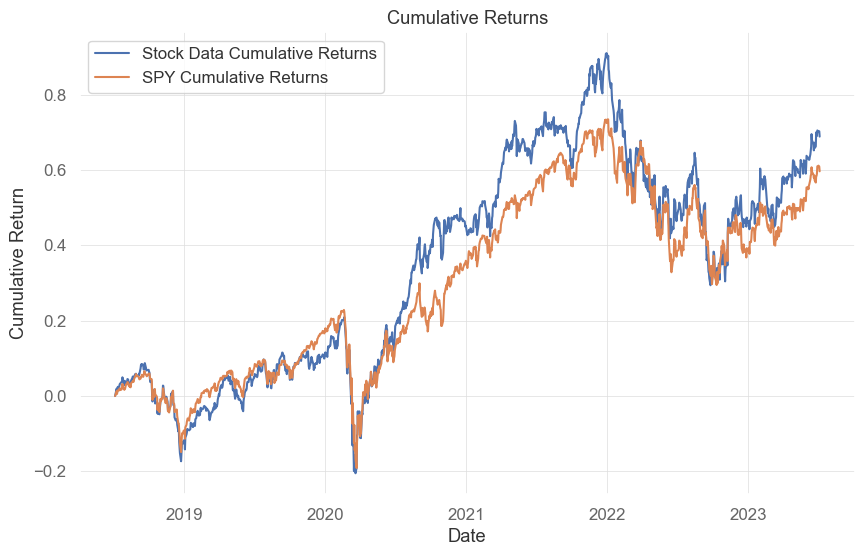

In [20]:
# Calculate cumulative returns for stock_data_df
stock_cumulative_returns = (portfolio_value_weighted / portfolio_value_weighted.iloc[0]) - 1

# Calculate cumulative returns for SPY_df
spy_cumulative_returns = (spy_portfolio_value / spy_portfolio_value.iloc[0]) - 1

# Plot cumulative returns for stock_data_df and SPY_df
plt.figure(figsize=(10, 6))
plt.plot(stock_cumulative_returns.index, stock_cumulative_returns.values, label='Stock Data Cumulative Returns')
plt.plot(spy_cumulative_returns.index, spy_cumulative_returns.values, label='SPY Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


# RISK ANALYSIS

In [21]:
# Format each stock dataframe so that it now displays daily return data
MSFT_returns = MSFT.pct_change().dropna()
MSFT_returns.index = pd.to_datetime(MSFT_returns.index, utc=True)
MSFT_returns.index = MSFT_returns.index.date

SYY_returns = SYY.pct_change().dropna()
SYY_returns.index = pd.to_datetime(SYY_returns.index, utc=True)
SYY_returns.index = SYY_returns.index.date

FDX_returns = FDX.pct_change().dropna()
FDX_returns.index = pd.to_datetime(FDX_returns.index, utc=True)
FDX_returns.index = FDX_returns.index.date

RIO_returns = RIO.pct_change().dropna()
RIO_returns.index = pd.to_datetime(RIO_returns.index, utc=True)
RIO_returns.index = RIO_returns.index.date

HD_returns = HD.pct_change().dropna()
HD_returns.index = pd.to_datetime(HD_returns.index, utc=True)
HD_returns.index = HD_returns.index.date

SBUX_returns = SBUX.pct_change().dropna()
SBUX_returns.index = pd.to_datetime(SBUX_returns.index, utc=True)
SBUX_returns.index = SBUX_returns.index.date

KO_returns = KO.pct_change().dropna()
KO_returns.index = pd.to_datetime(KO_returns.index, utc=True)
KO_returns.index = KO_returns.index.date

# Concat the stock dataframes
portfolio_returns = pd.concat([MSFT_returns, SYY_returns, FDX_returns, RIO_returns, HD_returns, SBUX_returns, KO_returns], 
                              axis=1, keys=["MSFT", "SYY", "FDX", "RIO", "HD", "SBUX", "KO"])
portfolio_returns = portfolio_returns.dropna()

# Apply the weights to the dataframe and return a new weighted dataframe
weighted_portfolio_df = portfolio_returns.dot(asset_weights)

# Do the same as above but for the SPY
SPY_returns = SPY.pct_change().dropna()
SPY_returns.index = pd.to_datetime(SPY_returns.index, utc=True)
SPY_returns.index = SPY_returns.index.date

weighted_SPY_df = SPY_returns.dot([1.0])

# Combine the daily return data from the Portfolio and the SPY into one new dataframe
combined_data = pd.concat([weighted_portfolio_df, weighted_SPY_df], axis="columns", join="inner", keys = ['Portfolio', 'SPY'])

<Axes: title={'center': 'Box Plot of Daily Returns - Portfolio vs S&P500'}>

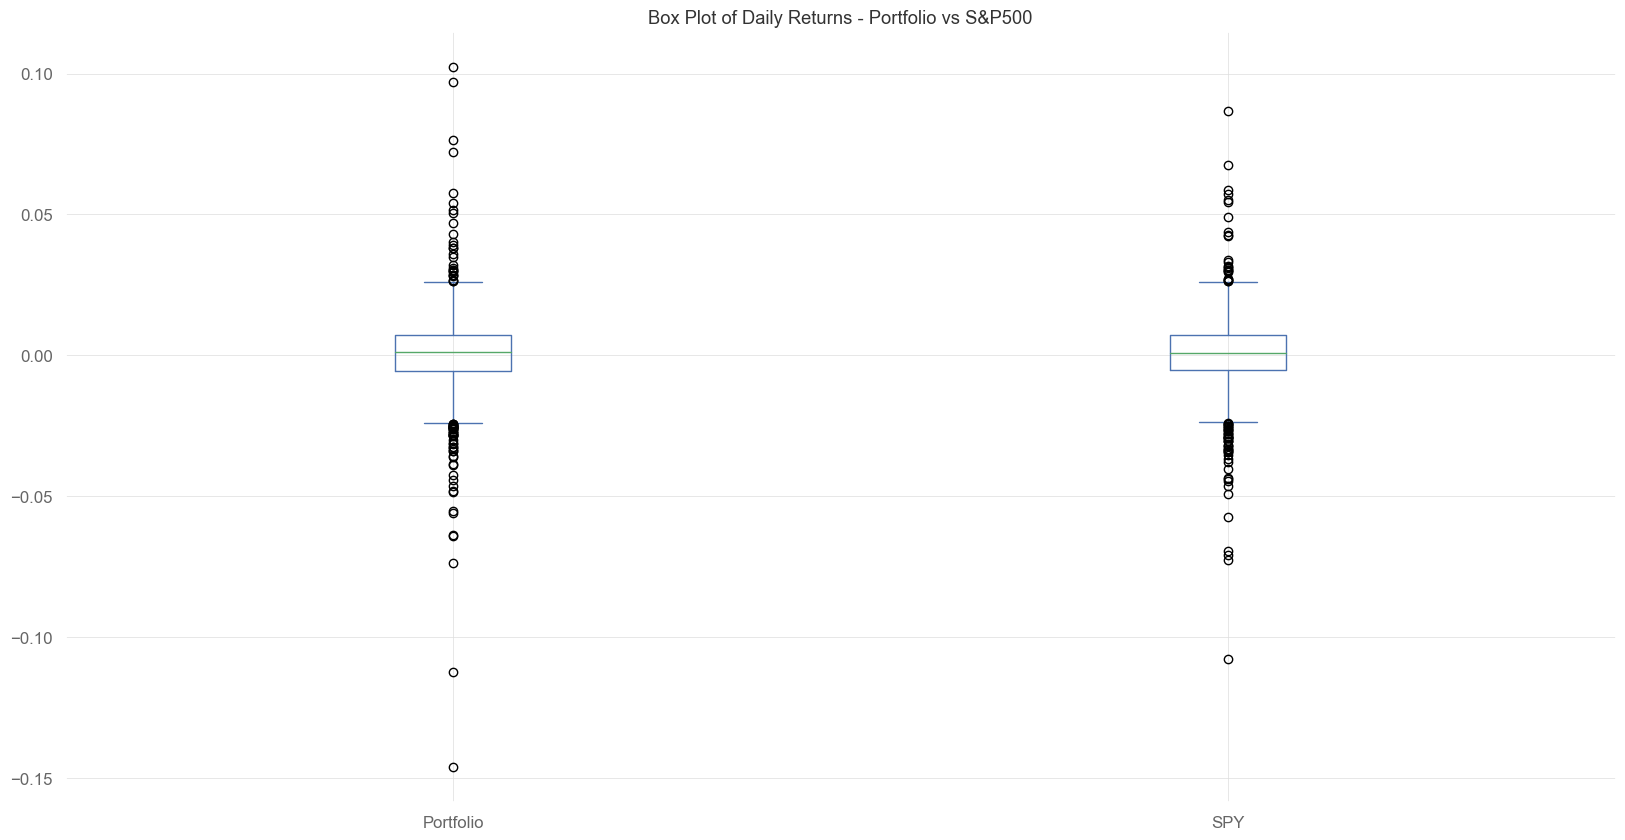

In [22]:
# Plot the Daily Returns data in a box plot to visualize the variance
combined_data.plot.box(figsize=(20, 10),title= 'Box Plot of Daily Returns - Portfolio vs S&P500')

<Axes: title={'center': 'Sharpe Ratio - Portfolio vs S&P 500'}>

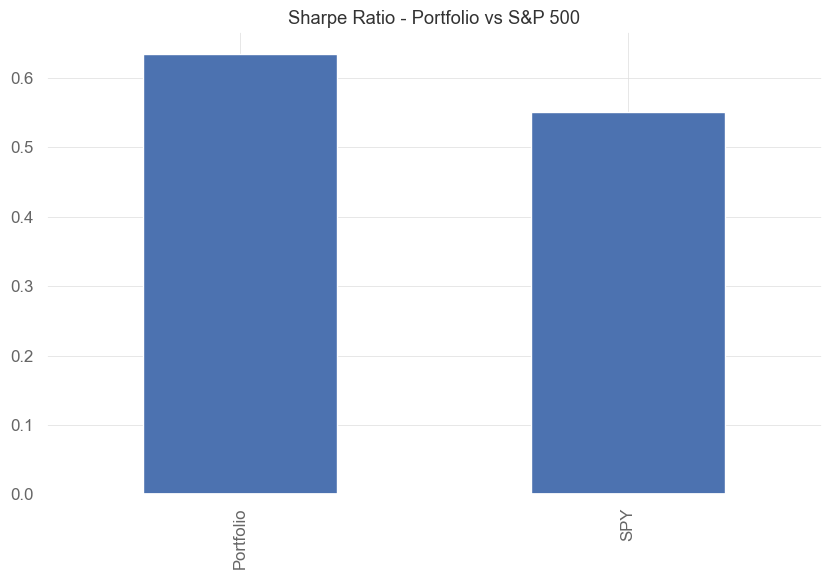

In [23]:
# Calculate the standard deviation
combined_data_std = combined_data.std()

# Calculate the annulaized standard deviation
annualized_std = combined_data_std * np.sqrt(252)

# Calculate the Sharpe ratios
sharpe_ratios = ((combined_data.mean()) * 252) / (combined_data.std() * np.sqrt(252))

# Plot the Sharpe ratios on a bar chart
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio - Portfolio vs S&P 500')

<Axes: title={'center': 'Rolling 30-Day Beta - Portfolio vs S&P 500'}>

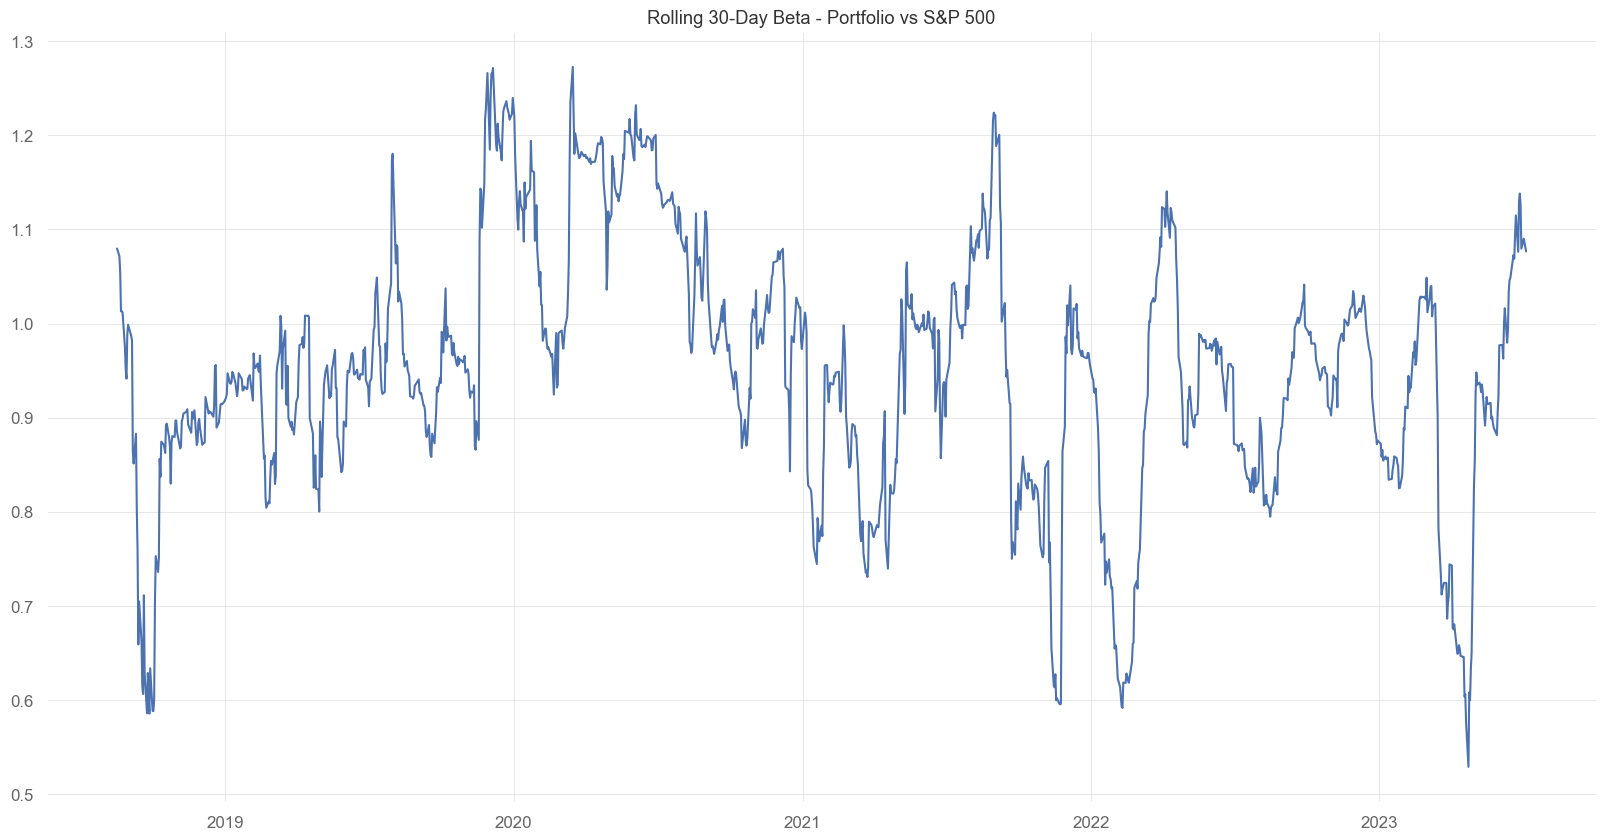

In [24]:
# Calculate the rolling 30-Day Beta for the Portfolio vs the SPY
rolling_covariance = weighted_portfolio_df.rolling(window=30).cov(combined_data['SPY'])
rolling_covariance.tail()
rolling_variance = combined_data['SPY'].rolling(window=30).var()
rolling_variance.tail()
rolling_beta = rolling_covariance / rolling_variance

# Plot the rolling 30-Day Beta on a line chart
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta - Portfolio vs S&P 500')

# SIMULATION ANALYSIS

In [25]:
# Configuring a Monte Carlo simulation for the portfolio
MC_portfolio = MCSimulation(
    portfolio_data = stock_data_df,
    weights = asset_weights,
    num_simulation = 250,
    num_trading_days = 252*number_of_years
)

# Configuring a Monte Carlo simulation for the S&P 500 comparison
MC_SPY = MCSimulation(
    portfolio_data = SPY_df,
    weights = SPY_weight,
    num_simulation = 250,
    num_trading_days = 252*number_of_years
)


In [26]:
# Run the Monte Carlo simulation for the Portfolio and the SPY (this will have no output)
MC_portfolio.calc_cumulative_return()
MC_SPY.calc_cumulative_return()

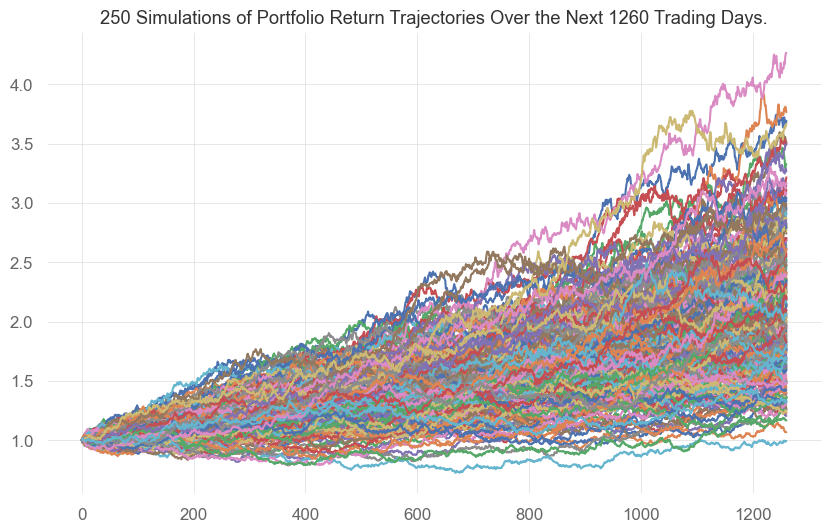

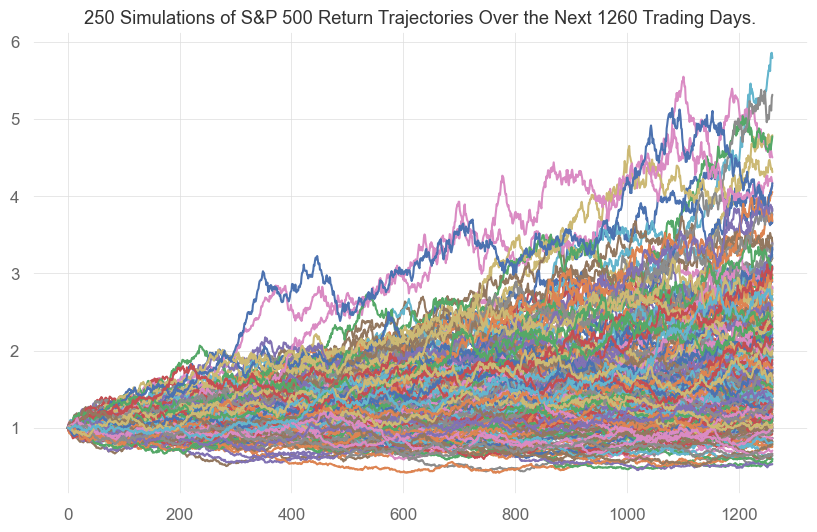

In [27]:
# Plot the results for each simulation on two line charts
MC_portfolio_plot = MC_portfolio.plot_simulation() 
MC_SPY_plot = MC_SPY.plot_simulation2()

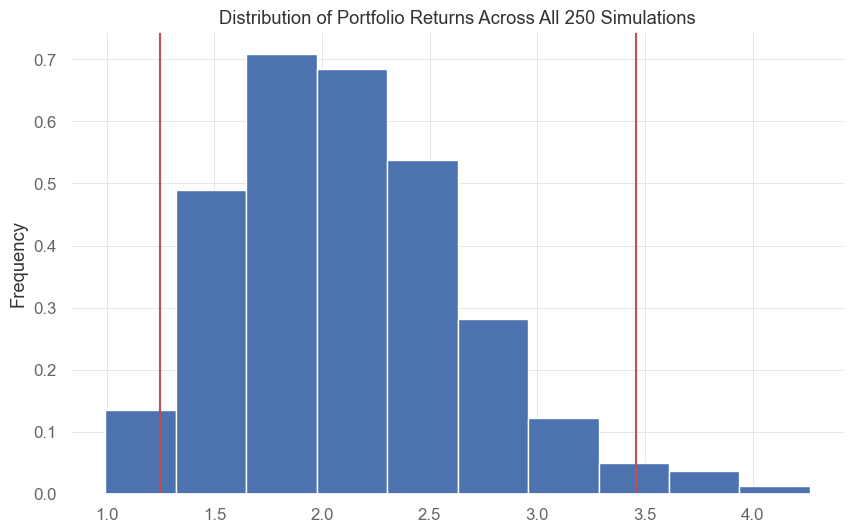

In [28]:
# Plot the portfolio simulation result distribution 
portfolio_dist_plot = MC_portfolio.plot_distribution()

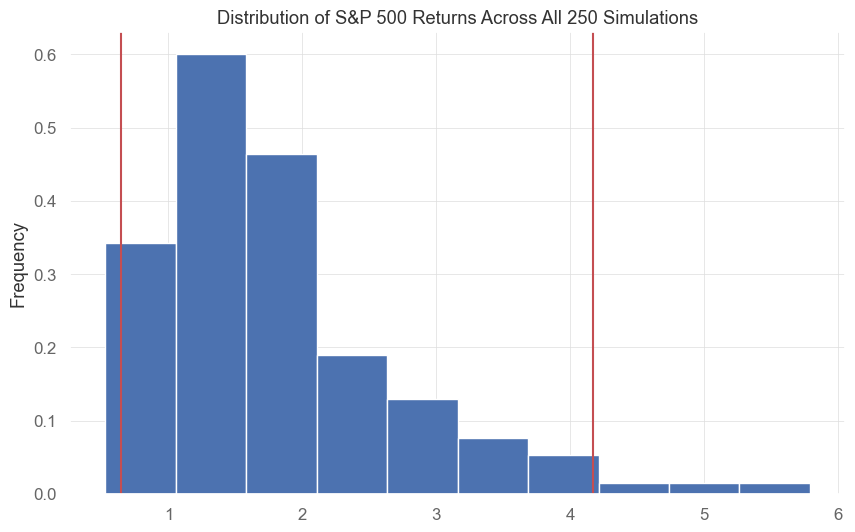

In [29]:
# Plot the SPY simulation result distribution 
SPY_dist_plot = MC_SPY.plot_distribution2()

## SIMULATION RESULTS

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_summary_statistics = MC_portfolio.summarize_cumulative_return()
sp500_summary_statistics = MC_SPY.summarize_cumulative_return()

# Extract the desired data from portfolio simulation summary statistics and assign it to variables
portfolio_ci_lower = round(portfolio_summary_statistics[8]*investment_amount,2)
portfolio_ci_upper = round(portfolio_summary_statistics[9]*investment_amount,2)
portfolio_mean_result = round(portfolio_summary_statistics[1]*investment_amount,2)
portfolio_twenty_fifth = round(portfolio_summary_statistics[4]*investment_amount,2)
portfolio_seventy_fifth = round(portfolio_summary_statistics[6]*investment_amount,2)
portfolio_min_result = round(portfolio_summary_statistics[3]*investment_amount,2)
portfolio_max_result = round(portfolio_summary_statistics[7]*investment_amount,2)

# Extract the desired data from SPY simulation summary statistics and assign it to variables
sp500_ci_lower = round(sp500_summary_statistics[8]*investment_amount,2)
sp500_ci_upper = round(sp500_summary_statistics[9]*investment_amount,2)
sp500_mean_result = round(sp500_summary_statistics[1]*investment_amount,2)
sp500_twenty_fifth = round(sp500_summary_statistics[4]*investment_amount,2)
sp500_seventy_fifth = round(sp500_summary_statistics[6]*investment_amount,2)
sp500_min_result = round(sp500_summary_statistics[3]*investment_amount,2)
sp500_max_result = round(sp500_summary_statistics[7]*investment_amount,2)


# Print the results
print(f"\nPORTFOLIO SIMULATION RESULTS                                S&P500 SIMULATION RESULTS\n")
print(f"\nInvestment amount = ${investment_amount}                                  Investment amount = ${investment_amount}")
print(f"Simulation Duration = {number_of_years} years                               Simulation Duration = {number_of_years} years\n")
print(f"95% Confidence Range = ${portfolio_ci_lower} to ${portfolio_ci_upper}               95% Confidence Range = ${sp500_ci_lower} to ${sp500_ci_upper}")
print(f"25th-75th Percentile = ${portfolio_twenty_fifth} to ${portfolio_seventy_fifth}              25th-75th Percentile = ${sp500_twenty_fifth} to ${sp500_seventy_fifth}\n")
print(f"Mean Outcome = ${portfolio_mean_result}                                    Mean Outcome = ${sp500_mean_result}\n")
print(f"Min Outcome = ${portfolio_min_result}                                      Min Outcome = ${sp500_min_result}")
print(f"Max Outcome = ${portfolio_max_result}                                    Max Outcome = ${sp500_max_result}\n")


PORTFOLIO SIMULATION RESULTS                                S&P500 SIMULATION RESULTS


Investment amount = $100000                                  Investment amount = $100000
Simulation Duration = 5 years                               Simulation Duration = 5 years

95% Confidence Range = $124773.7 to $345691.45               95% Confidence Range = $64838.79 to $416696.98
25th-75th Percentile = $174859.58 to $245729.65              25th-75th Percentile = $116597.32 to $211826.66

Mean Outcome = $212263.43                                    Mean Outcome = $180849.5

Min Outcome = $99330.77                                      Min Outcome = $52898.14
Max Outcome = $426593.66                                    Max Outcome = $578748.24



In [31]:
# Use Quantstats to pull historical returns data for the SPY
SPY_2 = qs.utils.download_returns('SPY', period='5y')

# Use Quantstats to pull historical returns data for each stock in the portfolio
MSFT_2 = qs.utils.download_returns('MSFT')
MSFT_2 = MSFT_2.loc[start_date[0:10]:end_date[0:10]]
SYY_2 = qs.utils.download_returns('SYY')
SYY_2 = SYY_2.loc[start_date[0:10]:end_date[0:10]]
FDX_2 = qs.utils.download_returns('FDX')
FDX_2 = FDX_2.loc[start_date[0:10]:end_date[0:10]]
RIO_2 = qs.utils.download_returns('RIO')
RIO_2 = RIO_2.loc[start_date[0:10]:end_date[0:10]]
HD_2 = qs.utils.download_returns('HD')
HD_2 = HD_2.loc[start_date[0:10]:end_date[0:10]]
SBUX_2 = qs.utils.download_returns('SBUX')
SBUX_2 = SBUX_2.loc[start_date[0:10]:end_date[0:10]]
KO_2 = qs.utils.download_returns('KO')
KO_2 = KO_2.loc[start_date[0:10]:end_date[0:10]]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
# Combine the data for each stock in the portfolio into one new dataframe
new_portfolio = pd.concat([MSFT_2, SYY_2, FDX_2, RIO_2, HD_2, SBUX_2, KO_2], axis=1, keys=tickers)

# Assign the portfolio weights
new_portfolio = new_portfolio.dot(asset_weights)


In [33]:
# Generate a .html report file summarizing the comparison between the portfolio and the SPY
qs.reports.html(new_portfolio, SPY_2, title = 'Portfolio vs S&P 500 (SPY)', output = 'Portfolio_vs_S&P500_Tearsheet.html')